In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("exchange_rate.csv")

In [4]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [5]:
df.isnull().sum()

date       0
Ex_rate    0
dtype: int64

In [6]:
df.dtypes

date        object
Ex_rate    float64
dtype: object

In [7]:
df.shape

(7588, 2)

In [8]:
df.columns = df.columns.str.strip()

In [9]:
# for converting into date time
df['date'] = pd.to_datetime(df['date'], dayfirst=True)
df.set_index('date', inplace=True)

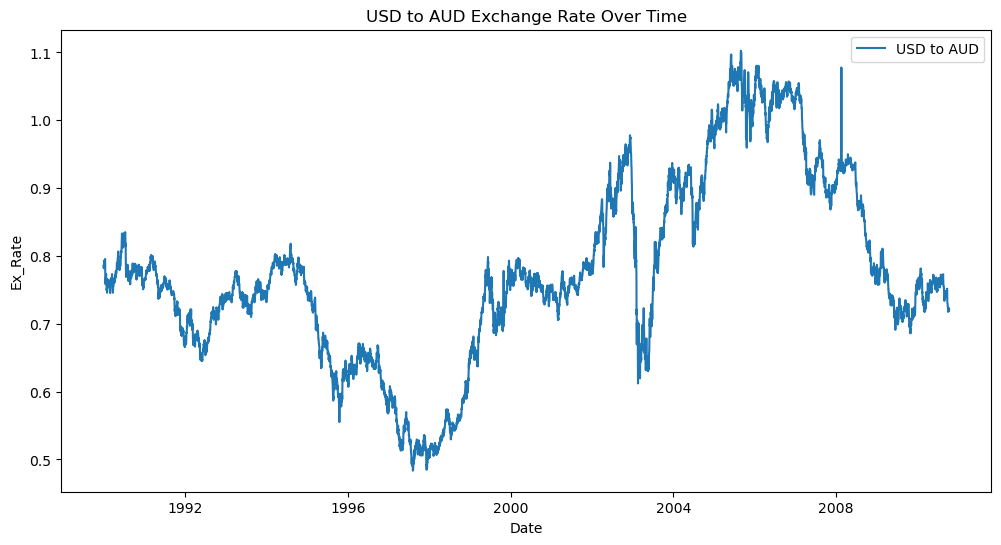

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Ex_rate'], label= 'USD to AUD')
plt.title('USD to AUD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Ex_Rate')
plt.legend()
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [12]:
result = adfuller(df["Ex_rate"])
print('ADF Statistic:', result[0])
print('p-value', result[1])

ADF Statistic: -1.664994180738078
p-value 0.44923273535982894


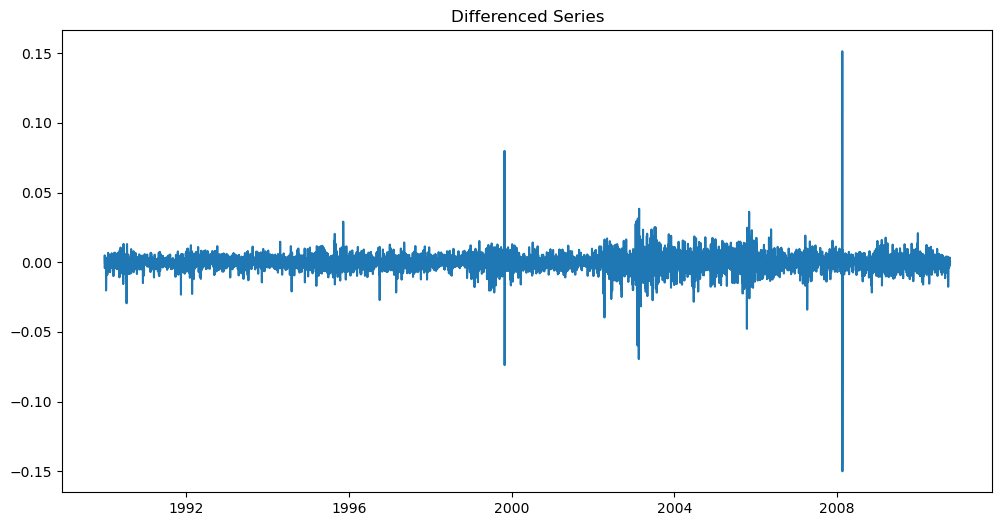

In [13]:
df['Ex_rate_diff'] = df["Ex_rate"].diff()

plt.figure(figsize=(12, 6))
plt.plot(df['Ex_rate_diff'])
plt.title("Differenced Series")
plt.show()

In [14]:
#ACF & PACF plots

<Figure size 1200x600 with 0 Axes>

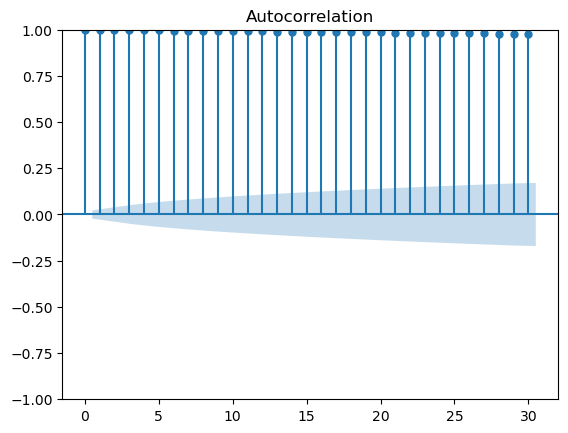

<Figure size 1200x600 with 0 Axes>

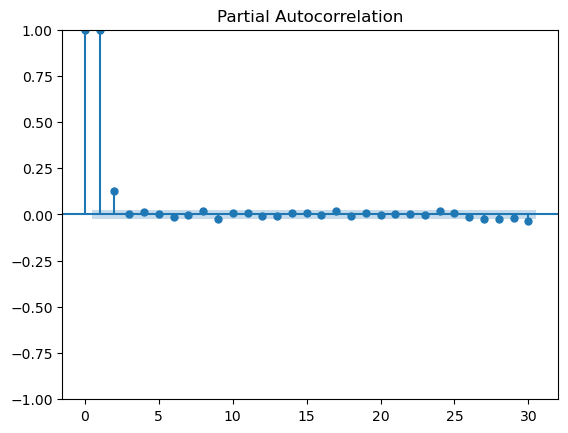

In [15]:
plt.figure(figsize=(12,6))
plot_acf(df['Ex_rate'], lags=30)
plt.show()

plt.figure(figsize=(12,6))
plot_pacf(df['Ex_rate'], lags=30)
plt.show()

In [16]:
model = ARIMA(df["Ex_rate"], order=(2, 1, 2))
model_fit = model.fit()

print(model_fit.forecast(steps=100))

c:\Users\Tejaswi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Tejaswi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Tejaswi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


2010-10-11    0.720809
2010-10-12    0.720841
2010-10-13    0.720835
2010-10-14    0.720839
2010-10-15    0.720838
                ...   
2011-01-14    0.720839
2011-01-15    0.720839
2011-01-16    0.720839
2011-01-17    0.720839
2011-01-18    0.720839
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


c:\Users\Tejaswi\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [17]:
forecast = model_fit.forecast(steps=100)
print("\nNext 12 Days Forecast")
print(forecast)


Next 12 Days Forecast
2010-10-11    0.720809
2010-10-12    0.720841
2010-10-13    0.720835
2010-10-14    0.720839
2010-10-15    0.720838
                ...   
2011-01-14    0.720839
2011-01-15    0.720839
2011-01-16    0.720839
2011-01-17    0.720839
2011-01-18    0.720839
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


In [18]:
print(forecast)

2010-10-11    0.720809
2010-10-12    0.720841
2010-10-13    0.720835
2010-10-14    0.720839
2010-10-15    0.720838
                ...   
2011-01-14    0.720839
2011-01-15    0.720839
2011-01-16    0.720839
2011-01-17    0.720839
2011-01-18    0.720839
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


In [19]:
print(forecast)

2010-10-11    0.720809
2010-10-12    0.720841
2010-10-13    0.720835
2010-10-14    0.720839
2010-10-15    0.720838
                ...   
2011-01-14    0.720839
2011-01-15    0.720839
2011-01-16    0.720839
2011-01-17    0.720839
2011-01-18    0.720839
Freq: D, Name: predicted_mean, Length: 100, dtype: float64


In [20]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model_h = ExponentialSmoothing(df["Ex_rate"],trend="add").fit(smoothing_level = 0.8, smoothing_slope=0.2)
forecast = model_h.forecast(steps=50)

c:\Users\Tejaswi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Tejaswi\AppData\Local\Temp\ipykernel_3548\281840907.py:3: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_h = ExponentialSmoothing(df["Ex_rate"],trend="add").fit(smoothing_level = 0.8, smoothing_slope=0.2)


In [21]:
last_date = df.index[-1]

forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=50, freq="D")
print(forecast_dates)


DatetimeIndex(['2010-10-11', '2010-10-12', '2010-10-13', '2010-10-14',
               '2010-10-15', '2010-10-16', '2010-10-17', '2010-10-18',
               '2010-10-19', '2010-10-20', '2010-10-21', '2010-10-22',
               '2010-10-23', '2010-10-24', '2010-10-25', '2010-10-26',
               '2010-10-27', '2010-10-28', '2010-10-29', '2010-10-30',
               '2010-10-31', '2010-11-01', '2010-11-02', '2010-11-03',
               '2010-11-04', '2010-11-05', '2010-11-06', '2010-11-07',
               '2010-11-08', '2010-11-09', '2010-11-10', '2010-11-11',
               '2010-11-12', '2010-11-13', '2010-11-14', '2010-11-15',
               '2010-11-16', '2010-11-17', '2010-11-18', '2010-11-19',
               '2010-11-20', '2010-11-21', '2010-11-22', '2010-11-23',
               '2010-11-24', '2010-11-25', '2010-11-26', '2010-11-27',
               '2010-11-28', '2010-11-29'],
              dtype='datetime64[ns]', freq='D')


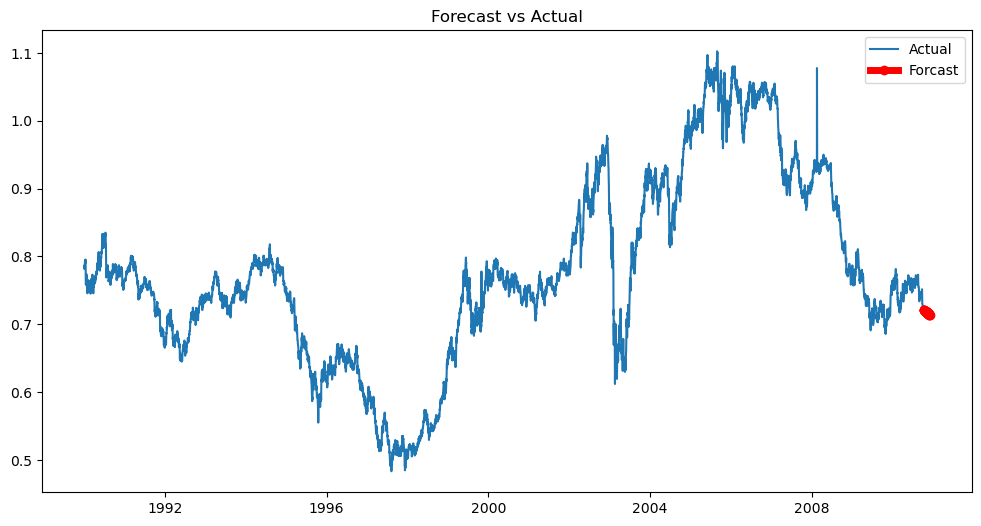

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Ex_rate'], label='Actual')
plt.plot(forecast_dates, forecast, label="Forcast", color='red', linewidth=5, marker='o')
plt.title('Forecast vs Actual')
plt.legend()
plt.show()


In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt,  ExponentialSmoothing


In [24]:
model_s = SimpleExpSmoothing(df['Ex_rate']).fit(smoothing_level = 0.2, optimized = False)


c:\Users\Tejaswi\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [25]:
forecast_s = model_s.forecast(12)
print("\nSimple Exponential Smoothing Forecast:")
print(forecast_s)


Simple Exponential Smoothing Forecast:
2010-10-11    0.721567
2010-10-12    0.721567
2010-10-13    0.721567
2010-10-14    0.721567
2010-10-15    0.721567
2010-10-16    0.721567
2010-10-17    0.721567
2010-10-18    0.721567
2010-10-19    0.721567
2010-10-20    0.721567
2010-10-21    0.721567
2010-10-22    0.721567
Freq: D, dtype: float64


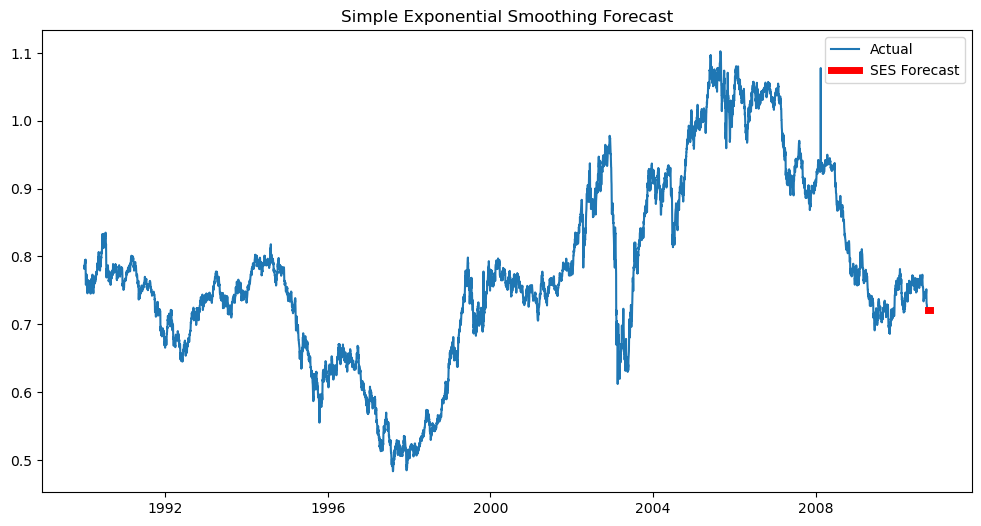

In [26]:
plt.figure(figsize=(12,6))
plt.plot(df['Ex_rate'], label ="Actual")
plt.plot(pd.date_range(df.index[-1], periods=12, freq='D'), forecast_s, label='SES Forecast', color='red', linewidth=5)
plt.title("Simple Exponential Smoothing Forecast")
plt.legend()
plt.show()

In [27]:
actual = df["Ex_rate"][-50]
actual = df['Ex_rate']

C:\Users\Tejaswi\AppData\Local\Temp\ipykernel_3548\3464201094.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  actual = df["Ex_rate"][-50]


In [28]:
y_true = np.array(actual[:50])
y_pred= np.array(forecast[:50])


In [29]:
print(forecast)
print(len(forecast))

2010-10-11    0.720762
2010-10-12    0.720627
2010-10-13    0.720492
2010-10-14    0.720357
2010-10-15    0.720222
2010-10-16    0.720088
2010-10-17    0.719953
2010-10-18    0.719818
2010-10-19    0.719683
2010-10-20    0.719548
2010-10-21    0.719413
2010-10-22    0.719278
2010-10-23    0.719143
2010-10-24    0.719009
2010-10-25    0.718874
2010-10-26    0.718739
2010-10-27    0.718604
2010-10-28    0.718469
2010-10-29    0.718334
2010-10-30    0.718199
2010-10-31    0.718064
2010-11-01    0.717930
2010-11-02    0.717795
2010-11-03    0.717660
2010-11-04    0.717525
2010-11-05    0.717390
2010-11-06    0.717255
2010-11-07    0.717120
2010-11-08    0.716986
2010-11-09    0.716851
2010-11-10    0.716716
2010-11-11    0.716581
2010-11-12    0.716446
2010-11-13    0.716311
2010-11-14    0.716176
2010-11-15    0.716041
2010-11-16    0.715907
2010-11-17    0.715772
2010-11-18    0.715637
2010-11-19    0.715502
2010-11-20    0.715367
2010-11-21    0.715232
2010-11-22    0.715097
2010-11-23 

In [30]:
print(type(actual))
print(actual)

<class 'pandas.core.series.Series'>
date
1990-01-01    0.785500
1990-01-02    0.781800
1990-01-03    0.786700
1990-01-04    0.786000
1990-01-05    0.784900
                ...   
2010-10-06    0.718494
2010-10-07    0.721839
2010-10-08    0.723197
2010-10-09    0.720825
2010-10-10    0.720825
Name: Ex_rate, Length: 7588, dtype: float64


In [31]:
print(df.head())

            Ex_rate  Ex_rate_diff
date                             
1990-01-01   0.7855           NaN
1990-01-02   0.7818       -0.0037
1990-01-03   0.7867        0.0049
1990-01-04   0.7860       -0.0007
1990-01-05   0.7849       -0.0011


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error



mea= mean_absolute_error(actual[:50], forecast[:50])
rmse = np.sqrt(mean_squared_error(actual[:50], forecast[:50]))

non_zero_actual = y_true != 0
mape=np.mean(np.abs((y_true[non_zero_actual]-y_pred[non_zero_actual])/y_true[non_zero_actual]))*100

print(f"mean:: {mea:.4f}")
print(f"rmse: {rmse:.4f}")
print(f"mape: {mape:.2f}")

mean:: 0.0513
rmse: 0.0528
mape: 6.64
